Let's first import libraries that we need

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Now we first load our data

In [36]:
df = pd.read_csv('D:\Python\ml basics\Placement_Data_Full_Class.csv',index_col='sl_no')
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


Pre processing of data

In [37]:
#first let's try to find the null values (if any) in out data
df.isnull().sum() 

#in output we can see that there are no null values in out data

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [38]:
# Our data doesn't have null values but it has some data in texual form so we'll have to do some feature engineering


text_columns = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']

for i in text_columns:
    #print(i)
    print(f"{df[i].value_counts()}")

gender
M    139
F     76
Name: count, dtype: int64
ssc_b
Central    116
Others      99
Name: count, dtype: int64
hsc_b
Others     131
Central     84
Name: count, dtype: int64
hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64
degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64
workex
No     141
Yes     74
Name: count, dtype: int64
specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64
status
Placed        148
Not Placed     67
Name: count, dtype: int64


In [39]:
ord_enc = OrdinalEncoder()
new_txt = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
for i in new_txt:
    df[i] = ord_enc.fit_transform(df[[i]])
df.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.00,1.0,58.80,1.0,270000.0
2,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.50,0.0,66.28,1.0,200000.0
3,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.00,0.0,57.80,1.0,250000.0
4,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.00,1.0,59.43,0.0,NaN
5,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.80,0.0,55.50,1.0,425000.0
6,1.0,55.00,1.0,49.80,1.0,2.0,67.25,2.0,1.0,55.00,0.0,51.58,0.0,NaN
7,0.0,46.00,1.0,49.20,1.0,1.0,79.00,0.0,0.0,74.28,0.0,53.29,0.0,NaN
8,1.0,82.00,0.0,64.00,0.0,2.0,66.00,2.0,1.0,67.00,0.0,62.14,1.0,252000.0
9,1.0,73.00,0.0,79.00,0.0,1.0,72.00,0.0,0.0,91.34,0.0,61.29,1.0,231000.0


In [40]:
#Here are the old and new values -- 

# M = 1
# F = 0


# central = 0
# others = 1


# Placed = 1
# Not placed = 0


# Yes = 1
# No = 0



# Commerce    1
# Science     2
# Arts        0

# Comm&Mgmt    0
# Sci&Tech     2
# Others       1


# Mkt&Fin     0
# Mkt&HR      1

Let's do some exploratory data analysis

In [41]:
# Here we don't need to do anything with salary column so we can drop it
df.drop(columns=['salary'],inplace=True)

In [42]:
df.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
gender,1.000000,-0.068969,0.019429,-0.021334,0.065945,0.071827,-0.173217,0.061345,0.085153,0.084294,-0.106160,-0.300531,0.090670
ssc_p,-0.068969,1.000000,0.116194,0.511472,0.066996,0.236364,0.538404,0.205896,0.175675,0.261993,-0.172536,0.388478,0.607889
ssc_b,0.019429,0.116194,1.000000,-0.137013,0.605883,0.050919,0.038070,0.100863,-0.040744,-0.018991,-0.051565,0.083120,0.037297
hsc_p,-0.021334,0.511472,-0.137013,1.000000,-0.019548,-0.164091,0.434206,-0.086450,0.141025,0.245113,-0.241630,0.354823,0.491228
hsc_b,0.065945,0.066996,0.605883,-0.019548,1.000000,0.152227,0.067229,0.057960,0.038357,0.039108,0.002232,0.090201,0.016945
hsc_s,0.071827,0.236364,0.050919,-0.164091,0.152227,1.000000,0.137276,0.596300,0.007856,0.075643,0.172107,0.039345,0.033442
degree_p,-0.173217,0.538404,0.038070,0.434206,0.067229,0.137276,1.000000,0.079317,0.122648,0.224470,-0.218286,0.402364,0.479861
degree_t,0.061345,0.205896,0.100863,-0.086450,0.057960,0.596300,0.079317,1.000000,0.105816,0.011509,0.084361,0.116666,-0.020352
workex,0.085153,0.175675,-0.040744,0.141025,0.038357,0.007856,0.122648,0.105816,1.000000,0.056735,-0.191174,0.168811,0.276060
etest_p,0.084294,0.261993,-0.018991,0.245113,0.039108,0.075643,0.224470,0.011509,0.056735,1.000000,-0.236315,0.218055,0.127639


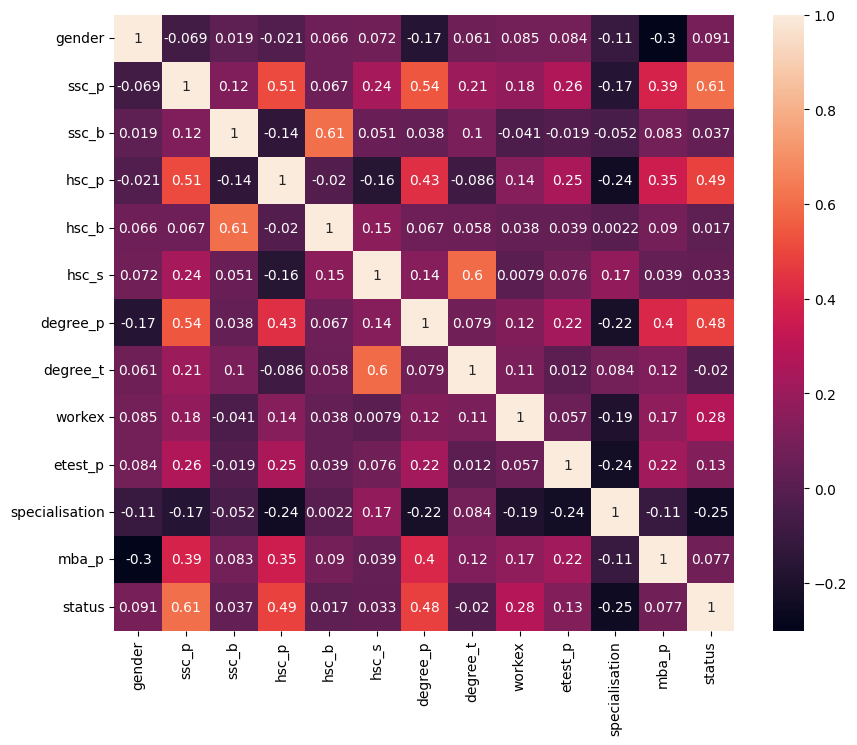

In [43]:
# let's visualize it using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [44]:
# here we can see that correlency of status with ssc_b, hsc_b, degree_t is very low
# so we can drop them

df.drop(columns=['hsc_b','degree_t','ssc_b'],inplace=True)
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,workex,etest_p,specialisation,mba_p,status
sl_no,,,,,,,,,,
1,1.0,67.00,91.00,1.0,58.00,0.0,55.0,1.0,58.80,1.0
2,1.0,79.33,78.33,2.0,77.48,1.0,86.5,0.0,66.28,1.0
3,1.0,65.00,68.00,0.0,64.00,0.0,75.0,0.0,57.80,1.0
4,1.0,56.00,52.00,2.0,52.00,0.0,66.0,1.0,59.43,0.0
5,1.0,85.80,73.60,1.0,73.30,0.0,96.8,0.0,55.50,1.0


In [45]:
#calculation of placed and not placed ratio in out data
len_placed = len(df[df['status']==1.0])
len_notplaced = len(df[df['status']==0.0])

print(f"percentage of placed candidates: {len_placed/(len_placed+len_notplaced)*100:2.2f}")
print(f"percentage of placed candidates: {len_notplaced/(len_placed+len_notplaced)*100:2.2f}")

percentage of placed candidates: 68.84
percentage of placed candidates: 31.16


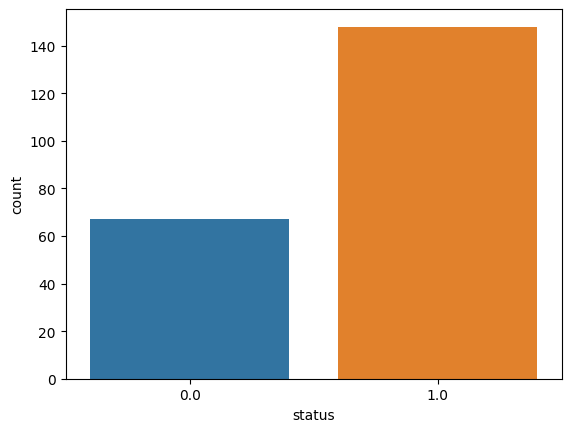

In [46]:
#plt.figure(figsize=(10,10))
sns.countplot(x='status',data=df)
plt.show()

In [47]:
# this distribution is good enough to design a model based on it

Splitting the data

In [48]:
x = df.drop(columns=['status'])
y = df['status']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.25)
x_train.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,workex,etest_p,specialisation,mba_p
sl_no,,,,,,,,,
171,0.0,63.40,67.2,1.0,60.0,0.0,58.06,1.0,69.28
91,0.0,85.00,90.0,1.0,82.0,0.0,92.00,0.0,68.03
209,0.0,43.00,60.0,2.0,65.0,0.0,92.66,1.0,62.92
68,1.0,80.92,78.5,1.0,67.0,0.0,68.71,0.0,60.99
186,0.0,88.00,72.0,2.0,78.0,0.0,82.00,1.0,71.43


In [50]:
x_test.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,workex,etest_p,specialisation,mba_p
sl_no,,,,,,,,,
109,1.0,61.00,82.00,1.0,69.0,0.0,84.00,0.0,58.31
208,1.0,83.33,78.00,1.0,61.0,1.0,88.56,0.0,71.55
107,1.0,61.08,50.00,2.0,54.0,0.0,71.00,0.0,65.69
108,1.0,82.00,90.00,1.0,83.0,0.0,80.00,1.0,73.52
52,1.0,54.40,61.12,1.0,56.2,0.0,67.00,1.0,62.65


In [51]:
y_train.head()

sl_no
171    0.0
91     1.0
209    0.0
68     1.0
186    1.0
Name: status, dtype: float64

In [52]:
y_test.head()

sl_no
109    1.0
208    1.0
107    0.0
108    1.0
52     0.0
Name: status, dtype: float64

Let's build a logistic regression model to predict whether a candidate will be placed or not

In [53]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

#our dataset is small and we need to predict one versus others so liblinear solver is a good choice.

LogisticRegression(solver='liblinear')

In [54]:
#testing our model on train data
model.score(x_train,y_train)

0.8757763975155279

In [55]:
#now let's predict values for test data
predicted = model.predict(x_test)
predicted_df = pd.DataFrame(predicted)
predicted_df.head()

,0
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0


Let's evaluate our model

In [56]:
acuuracy = model.score(x_test,y_test)
print(f"accuracy of the model is : {acuuracy*100: .2f}")

accuracy of the model is :  87.04


<Axes: >

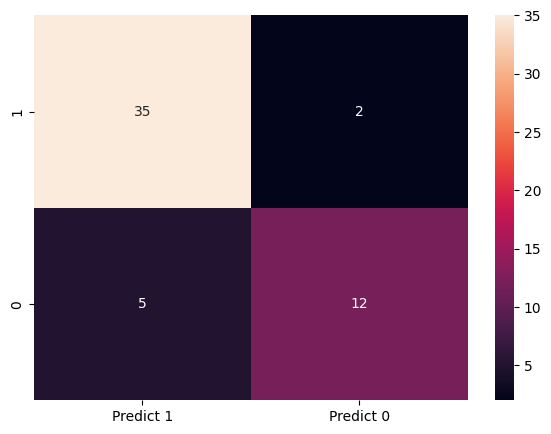

In [57]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predicted, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)